In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import itertools
from networkx.algorithms import community
import operator
from itertools import islice

df = pd.read_excel('/Scripts/combined_graph/combined.xlsx')



In [2]:
#creating edge list - two men have link if they were teammates
edge_list = []

for index, row in df.iterrows():
    current = row
    current_club = row['Club']
    current_season = row['Season']
    current_df = df[df["Season"].isin([current_season])][df["Club"].isin([current_club])]
    current_df = df[(df.Season == current_season) & (df.Club == current_club)]
    arr = np.array(current_df['Name'])

    for i in range(len(arr)):
        try:
            if current['Name'] != arr[i]:
                edge_list.append([current['Name'], arr[i]])
        except: 
            print('e')
            pass


In [3]:
#creating the graph from the edge list
G = nx.Graph()
G.add_edges_from(edge_list)
print('Basic information about the graph:')
print(nx.info(G))


Basic information about the graph:
Name: 
Type: Graph
Number of nodes: 6579
Number of edges: 290837
Average degree:  88.4137


In [5]:
#nodes with the most and the fewest degrees
degrees = [(node, val) for (node, val) in G.degree()]
degree_table = pd.DataFrame(degrees, columns=['Club','Degree'])
degree_table.sort_values(by=['Degree'], inplace = True, ascending = False)
degree_table.reset_index(drop=True, inplace=True)
degree_table.index += 1
print('Players with the most connections:')
print(degree_table[:20])
print()
print('Players with the fewest connections:')
print(degree_table[-20:])


Players with the most connections:
                 Club  Degree
1         Mark Hughes     602
2        Peter Crouch     504
3       Jermain Defoe     486
4        James Milner     460
5       Sam Allardyce     455
6        Wayne Bridge     448
7        Scott Parker     448
8   Kieran Richardson     447
9      Harry Redknapp     446
10    Wayne Routledge     427
11           Joe Cole     420
12       Robbie Keane     418
13     David Unsworth     415
14      Frank Lampard     413
15      Steve Sidwell     413
16      Craig Bellamy     409
17         Shay Given     405
18        Steve Bruce     390
19   Daniel Sturridge     388
20      Phil Bardsley     386

Players with the fewest connections:
                    Club  Degree
6560        Stuart Brock      26
6561  Ian Kenneth Taylor      26
6562          Ray Ranson      26
6563  Mark Andrew Draper      26
6564         Amad Diallo      26
6565   Donny van de Beek      26
6566           Ned Zelic      26
6567  Öyvind Leonhardsen      25


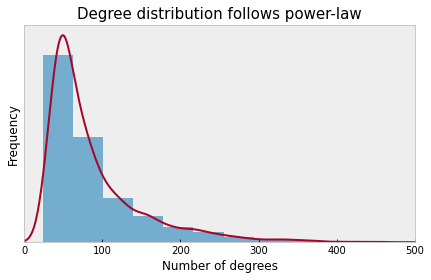

In [6]:
#degree distribution
degree = [G.degree(n) for n in G.nodes()]
degree = pd.DataFrame(degree)
plt.style.use("bmh")
fig, ax = plt.subplots(figsize = (7,4))
degree.plot(ax = ax, kind = 'hist', density = True, alpha = 0.65, bins = 15)
degree.plot(ax = ax, kind = 'kde')
ax.grid(False)
ax.set_xlabel('Number of degrees')
ax.set_xlim(0,500)
ax.set_ylabel('Frequency')
ax.set_yticks([])
ax.get_legend().remove()
ax.set_title('Degree distribution follows power-law', size = 15)

plt.show()


In [7]:
#Average shortest path length
spl = nx.average_shortest_path_length(G)
print("Average shortest path length:", spl)

Average shortest path length: 2.6000753939848686


In [8]:
#Network density
density = nx.density(G)
print("Network density:", density)


Network density: 0.013440824063556473


In [9]:
#Diameter
print("Diameter:", nx.diameter(G))

Diameter: 4


In [10]:
#Triadic closure / clustering coefficient
triadic_closure = nx.transitivity(G)
print("Triadic closure:", triadic_closure)

Triadic closure: 0.40515003533374755


In [11]:
#eigenvectors
eigenvector_dict = nx.eigenvector_centrality(G)
eigenvector_table = pd.DataFrame(eigenvector_dict.items())
eigenvector_table.sort_values(by=[1], inplace = True, ascending = False)
eigenvector_table.reset_index(drop=True, inplace=True)
eigenvector_table.index += 1
print('The most important players according to the eigenvectors:')
print(eigenvector_table[:10])


The most important players according to the eigenvectors:
                    0         1
1         Mark Hughes  0.070664
2       Jermain Defoe  0.065664
3        Peter Crouch  0.064980
4      Harry Redknapp  0.062394
5   Kieran Richardson  0.061965
6        Robbie Keane  0.059642
7        James Milner  0.058700
8        Scott Parker  0.057822
9        Wayne Bridge  0.057763
10      Craig Bellamy  0.056172


In [12]:
#betweenness
betweenness_dict = nx.betweenness_centrality(G)
betweenness_table = pd.DataFrame(betweenness_dict.items())
betweenness_table.sort_values(by=[1], inplace = True, ascending = False)
betweenness_table.reset_index(drop=True, inplace=True)
betweenness_table.index += 1
print('The most important players according to betweenness:')
print(betweenness_table[:10])
#érdekes lehet betweenness és degree összehasonlítés, ki a váratlan, az köthet össze csoportokat



The most important players according to betweenness:
                  0         1
1       Mark Hughes  0.013370
2      James Milner  0.008269
3     Sam Allardyce  0.008101
4      Scott Parker  0.007994
5    Richard Wright  0.007304
6     Jermain Defoe  0.007218
7     Frank Lampard  0.007209
8      Peter Crouch  0.007190
9    David Unsworth  0.007115
10  Wayne Routledge  0.006784


In [13]:
#teammates
def take(n, iterable):
    "Return first n items of the iterable as a list"
    return list(islice(iterable, n))

def CountFrequency(my_list): 
  
    # Creating an empty dictionary  
    freq = {} 
    for item in my_list: 
        to_check = str([item[0], item[1]])
        if (to_check in freq):
            freq[to_check] += 1
        else:
            freq[to_check] = 1

    sorted_freq = dict( sorted(freq.items(), key=operator.itemgetter(1),reverse=True))
    n_items = take(200, sorted_freq.items())
    n_items = pd.DataFrame(n_items, columns = ['Players', 'Weight'])
    n_items = n_items[:100:2]
    n_items.reset_index(drop = True, inplace=True)
    n_items.index += 1
    print(n_items)

CountFrequency(edge_list)


                                      Players  Weight
1              ['Ryan Giggs', 'Paul Scholes']      21
2              ['Paul Scholes', 'Ryan Giggs']      21
3             ['Alex Ferguson', 'Ryan Giggs']      21
4              ['Ryan Giggs', 'Gary Neville']      19
5              ['Gary Neville', 'Ryan Giggs']      19
6           ['Gary Neville', 'Alex Ferguson']      19
7                ['Wes Brown', "John O'Shea"]      18
8              ['Tony Hibbert', 'Leon Osman']      17
9           ['Ryan Giggs', 'Darren Fletcher']      15
10      ['Jamie Carragher', 'Steven Gerrard']      15
11                ['Wes Brown', 'Ryan Giggs']      14
12              ['Wes Brown', 'Gary Neville']      14
13                ['Ryan Giggs', 'Wes Brown']      14
14              ['Gary Neville', 'Wes Brown']      14
15          ['Theo Walcott', 'Arsène Wenger']      13
16            ['Frank Lampard', 'John Terry']      13
17            ['Ryan Giggs', 'Rio Ferdinand']      13
18        ['Darren Fletcher'